Sheet 07

(a)

(b)

In [149]:
import numpy as np
import matplotlib.pyplot as plt

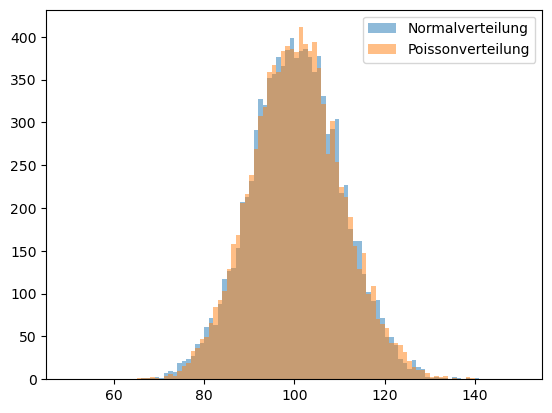

In [150]:
def kog_smir_test(X, Y, alpha):
    if len(X) != len(Y):
        print("X and Y have different binning")
        return False
    else:
        X_cum = np.cumsum(X)/np.sum(X)
        Y_cum = np.cumsum(Y)/np.sum(Y)
        d_max = np.max(np.abs(X_cum - Y_cum))
        K_alpha = np.sqrt(-0.5*np.log(alpha/2))
        if d_max * np.sqrt(np.sum(X)*np.sum(Y)/(np.sum(X)+np.sum(Y))) > K_alpha:
            return False 
        else:
            return True

        


def data(mu, size=10000, bins=100):
    #aus (a)
    sigma = np.sqrt(mu)
    X = np.random.normal(mu, sigma, size)
    Y = np.random.poisson(mu, size)
    X = np.round(X)
    bins_ = np.linspace(-5*sigma+mu, 5*sigma+mu, bins+1)
    X_binned = np.histogram(X, bins=bins_)
    Y_binned = np.histogram(Y, bins=bins_)
    return bins_, X_binned, Y_binned

bins, X, Y = data(100)

width = np.diff(bins)
center = (bins[:-1] + bins[1:]) / 2

plt.bar(center, X[0], align='center', width=width, label="Normalverteilung", alpha=0.5)
plt.bar(center, Y[0], align='center', width=width, label="Poissonverteilung", alpha=0.5)
plt.legend()

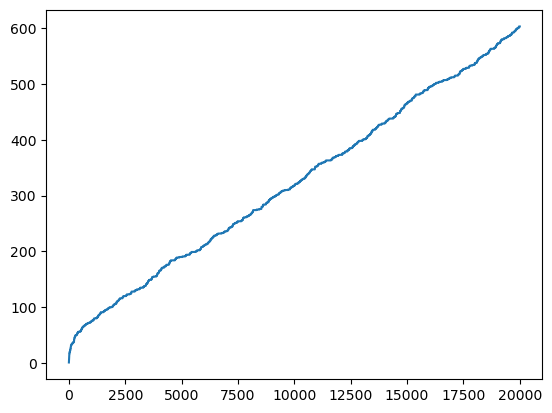

In [151]:
results = np.zeros(20000)
for i in range(1,20000):
    bins, X, Y = data(i)
    results[i] = kog_smir_test(X[0], Y[0], 0.05)
    
result_cum = np.cumsum(results == False)
plt.plot(result_cum)